In [1]:
%load_ext autoreload
%autoreload 2


In [ ]:
import os
from os.path import join
import sys
sys.path.append("/n/home12/binxuwang/Github/DiffusionLearningCurve")
from core.dataset_lib import load_dataset
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch as th
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
from PIL import Image
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from circuit_toolkit.plot_utils import saveallforms
saveroot = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/"

In [3]:

import glob
import re
from os.path import join
saveroot = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/"

def load_generated_samples(expname, epoch_num):
    saveroot = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/"
    expdir = join(saveroot, expname)
    samples_dir = join(expdir, "samples")
    sample_tsr = th.load(join(samples_dir, f"samples_epoch_{epoch_num:06d}.pt"))
    imggrid = Image.open(join(samples_dir, f"samples_epoch_{epoch_num:06d}.png"))
    return sample_tsr, imggrid


def get_largest_sample_step(expname):
    """Get the largest sample step number from the samples directory."""
    samples_dir = join(saveroot, expname, "samples")
    sample_files = glob.glob(join(samples_dir, "samples_epoch_*.pt"))
    
    if not sample_files:
        return None
    
    step_numbers = []
    for filepath in sample_files:
        match = re.search(r'samples_epoch_(\d+)\.pt$', filepath)
        if match:
            step_numbers.append(int(match.group(1)))
    
    return max(step_numbers) if step_numbers else None

In [4]:
# Load FFHQ 32x32 dataset
Xtsr_raw, imgsize = load_dataset("ffhq-32x32", normalize=True)

/n/home12/binxuwang/Github/DiffusionLearningCurve/core/dataset_lib.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Xtsr_raw = torch.load(join(word_dataset_root, "ffhq-3

ffhq-32x32 dataset: torch.Size([70000, 3, 32, 32])
Raw value range 1.0 0.0
Normalizing dataset to [-1.0, 1.0]


In [6]:
!echo $STORE_DIR/DL_Projects/DiffusionSpectralLearningCurve/

/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/


In [ ]:
saveroot = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/"
# "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_DSM"
# "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_ESM"
expname = "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_ESM"
expdir = join(saveroot, expname)
samples_dir = join(expdir, "samples")

In [18]:
sample_tsr = th.load(join(samples_dir, "samples_epoch_100000.pt"))

/tmp/ipykernel_617954/3931030662.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample_tsr = th.load(join(samples_dir, "samples_epoch_100000.pt"))


In [ ]:
sample_pp_tsr = (sample_tsr * 0.5 + 0.5).clamp(0, 1).reshape(-1, 3, 32, 32)

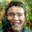

In [29]:
ToPILImage()(sample_pp_tsr[-1])

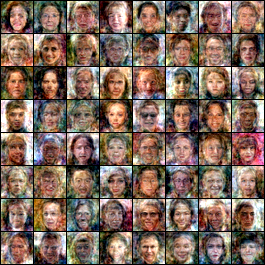

In [15]:
Image.open(join(samples_dir, "samples_epoch_100000.png"))

### Loading and comparing at scale

/tmp/ipykernel_617954/3937904296.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample_tsr = th.load(join(samples_dir, "samples_epoch_100000.pt"))


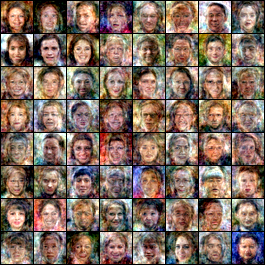

In [37]:
saveroot = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/"
expname = "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_ESM"
expdir = join(saveroot, expname)
samples_dir = join(expdir, "samples")
sample_tsr = th.load(join(samples_dir, "samples_epoch_100000.pt"))
imggrid = Image.open(join(samples_dir, "samples_epoch_100000.png"))
imggrid

In [ ]:
sample_mat = sample_tsr.clone()
dist2trainset = torch.cdist(sample_mat, Xtsr_raw.flatten(1).cuda(), p=2)
dist2trainset.shape

torch.Size([2048, 70000])

In [45]:
min_dists, min_indices = torch.topk(dist2trainset, k=5, dim=1, largest=False)

In [46]:
min_dists

tensor([[19.9289, 20.3253, 20.4264, 20.4337, 20.5252],
        [17.8150, 18.3941, 18.5050, 18.8710, 18.9688],
        [19.7948, 20.4765, 20.8736, 21.0097, 21.1127],
        ...,
        [20.4666, 21.0736, 21.2459, 21.4722, 21.5267],
        [17.7688, 18.2662, 18.2938, 18.4238, 18.5917],
        [21.6368, 21.6416, 22.2829, 22.2844, 22.3444]], device='cuda:0')

### Comparing samples

In [88]:
sample_tsr_ESM, imggrid_ESM = load_generated_samples("FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_ESM", 100000)
sample_tsr_DSM, imggrid_DSM = load_generated_samples("FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM", 100000)

/tmp/ipykernel_617954/2378753679.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample_tsr = th.load(join(samples_dir, f"samples_epoch_{epoch_num:06d}.pt"))


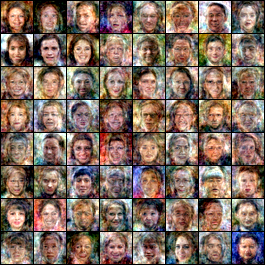

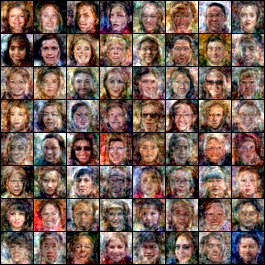

In [59]:
display(imggrid_ESM, imggrid_DSM)

In [ ]:
dist2trainset_esm = torch.cdist(sample_tsr_ESM.flatten(1), Xtsr_raw.flatten(1).cuda(), p=2)
min_dists_esm, min_indices_esm = torch.topk(dist2trainset_esm, k=5, dim=1, largest=False)

dist2trainset_dsm = torch.cdist(sample_tsr_DSM.flatten(1), Xtsr_raw.flatten(1).cuda(), p=2)
min_dists_dsm, min_indices_dsm = torch.topk(dist2trainset_dsm, k=5, dim=1, largest=False)

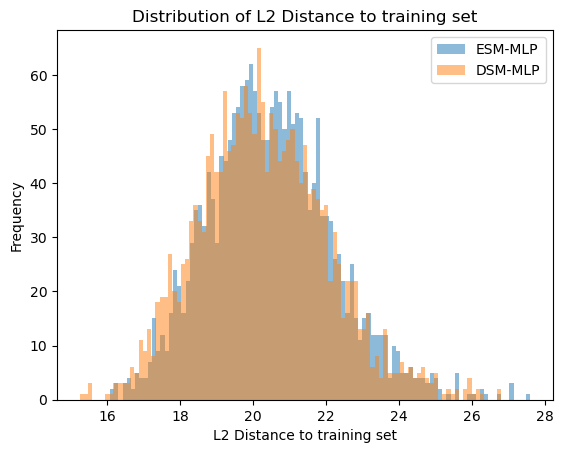

In [94]:
plt.hist(min_dists_esm[:,0].cpu().numpy(), bins=100, alpha=0.5, label="ESM-MLP")
plt.hist(min_dists_dsm[:,0].cpu().numpy(), bins=100, alpha=0.5, label="DSM-MLP")
plt.legend()
plt.xlabel("L2 Distance to training set")
plt.ylabel("Frequency")
plt.title("Distribution of L2 Distance to training set")
plt.show()

In [67]:
Xtsr_raw.std()

tensor(0.5275)

In [60]:
!ls {expdir}

args.json  config.json		      loss_store.pkl  model_final.pth
ckpts	   learned_samples_final.png  loss_traj.pkl   samples


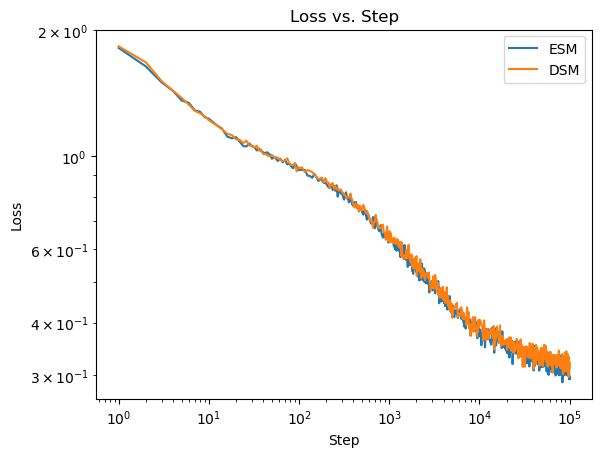

In [66]:
import pickle as pkl
from os.path import join

saveroot = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/"

expname = "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_ESM"
expdir = join(saveroot, expname)
loss_traj_ESM = pkl.load(open(join(expdir, "loss_store.pkl"), "rb"))

expname = "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM"
expdir = join(saveroot, expname)
loss_traj_DSM = pkl.load(open(join(expdir, "loss_store.pkl"), "rb"))

plt.plot(loss_traj_ESM.keys(), loss_traj_ESM.values(), label="ESM")
plt.plot(loss_traj_DSM.keys(), loss_traj_DSM.values(), label="DSM")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss vs. Step")
plt.legend()
plt.show()

In [ ]:
sample_tsr_ESM, imggrid_ESM = load_generated_samples("FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_ESM", 100000)
sample_tsr_DSM, imggrid_DSM = load_generated_samples("FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM", 100000)

## Across runs of all models

In [70]:
!ls -d {saveroot}/FFHQ*ESM* | xargs -n 1 basename

FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_ESM
FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_ESM
FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_ESM
FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_ESM
FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_ESM


In [ ]:
!ls -d {saveroot}/FFHQ*DSM* | xargs -n 1 basename

FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_DSM
FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_DSM
FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_DSM
FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_DSM
FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM


In [75]:
expnames_ESM_DSM = ["FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_DSM",
            "FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_ESM",
            "FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_DSM",
            "FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_ESM",
            "FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_DSM",
            "FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_ESM",
            # "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_DSM",
            # "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_ESM",
            "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM",
            "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_ESM",
            ]

### Loss curve comparison

FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_DSM FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_ESM
FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_DSM FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_ESM
No loss_store.pkl found in /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_DSM or /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_ESM
FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_DSM FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_ESM
FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_ESM


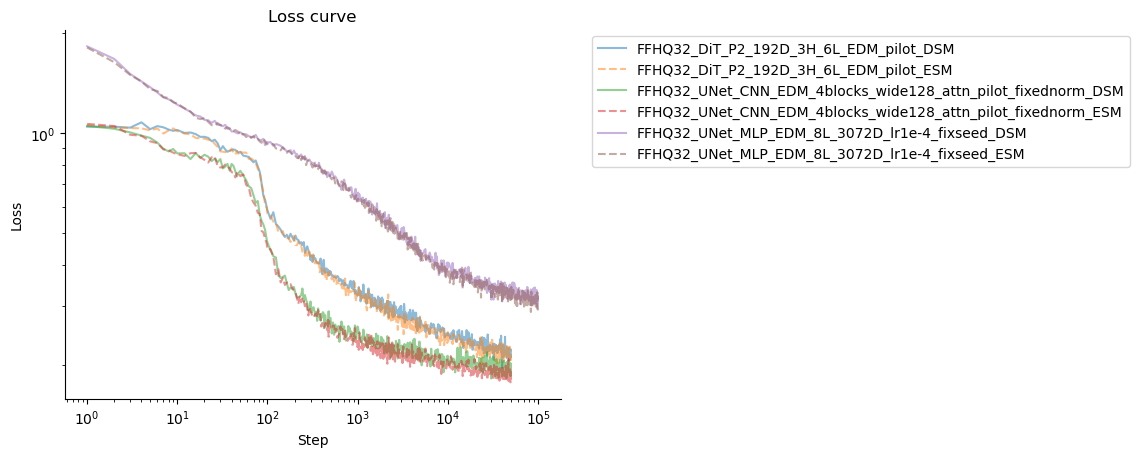

In [ ]:
for run_i in [0, 2, 4, 6]:
    run1_name = expnames_ESM_DSM[run_i]
    run2_name = expnames_ESM_DSM[run_i+1]
    print(run1_name, run2_name)
    expdir1 = join(saveroot, run1_name)
    expdir2 = join(saveroot, run2_name)
    try:
        loss_traj_esm = pkl.load(open(join(expdir1, "loss_store.pkl"), "rb"))
        loss_traj_dsm = pkl.load(open(join(expdir2, "loss_store.pkl"), "rb"))
    except:
        print(f"No loss_store.pkl found in {expdir1} or {expdir2}")
        continue
    plt.plot(loss_traj_esm.keys(), loss_traj_esm.values(), label=run1_name, linestyle="-", alpha=0.5)
    plt.plot(loss_traj_dsm.keys(), loss_traj_dsm.values(), label=run2_name, linestyle="--", alpha=0.5)
plt.yscale("log")
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_DSM 
vs
 FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_ESM
Final loss comparison
DSM loss: 0.19377870112657547 
ESM loss: 0.18654726147651673
t-test: TtestResult(statistic=3.873187720370087, pvalue=0.0002755192685929826, df=58.0)
Loss curve comparison


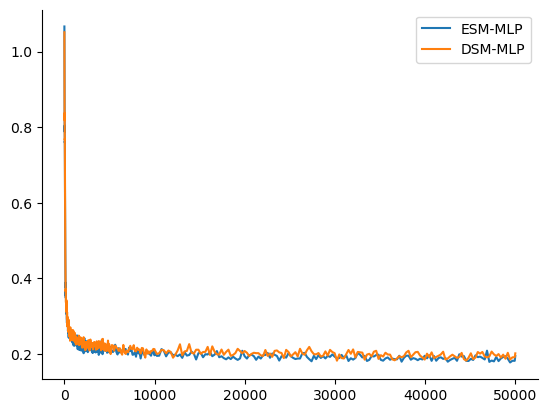

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel
run1_name = expnames_ESM_DSM[4]
run2_name = expnames_ESM_DSM[4+1]
print(run1_name, "\nvs\n", run2_name)
loss_traj_dsm = pkl.load(open(join(join(saveroot, run1_name), "loss_store.pkl"), "rb"))
loss_traj_esm = pkl.load(open(join(join(saveroot, run2_name), "loss_store.pkl"), "rb"))
df_dsm = pd.DataFrame(list(loss_traj_dsm.items()), columns=['step', 'loss'])
df_esm = pd.DataFrame(list(loss_traj_esm.items()), columns=['step', 'loss'])

print("Final loss comparison")
print("DSM loss:", df_dsm.iloc[-10:,]['loss'].mean(), "\nESM loss:", df_esm.iloc[-10:,]['loss'].mean())
print("t-test:", ttest_ind(df_dsm.iloc[-30:]['loss'], df_esm.iloc[-30:]['loss']))

print("Loss curve comparison")
plt.plot(df_esm['step'], df_esm['loss'], label="ESM-MLP")
plt.plot(df_dsm['step'], df_dsm['loss'], label="DSM-MLP")
plt.legend()
plt.show()

In [ ]:
df_esm

step      loss
0        1  1.066696
1        2  1.051195
2        3  0.989086
3        4  0.982177
4        5  0.944500
..     ...       ...
489  49168  0.186927
490  49424  0.176937
491  49680  0.181534
492  49936  0.181318
493  50000  0.193977

[494 rows x 2 columns]

### Sample comparison across runs

/tmp/ipykernel_617954/2378753679.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample_tsr = th.load(join(samples_dir, f"samples_epoch_{epoch_num:06d}.pt"))


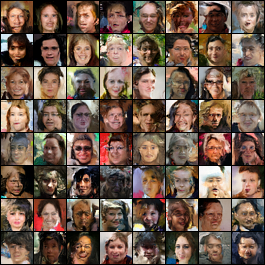

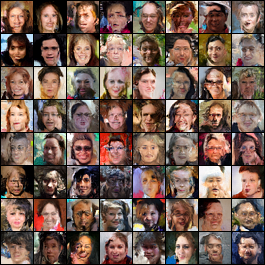

In [78]:
sample_tsr_DSM, imgrid_DSM = load_generated_samples(expnames_ESM_DSM[0], get_largest_sample_step(expnames_ESM_DSM[0]))
sample_tsr_ESM, imgrid_ESM = load_generated_samples(expnames_ESM_DSM[1], get_largest_sample_step(expnames_ESM_DSM[1]))

display(imgrid_DSM)
display(imgrid_ESM)

FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_DSM step: 42512
FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_ESM step: 42512


/tmp/ipykernel_617954/2378753679.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample_tsr = th.load(join(samples_dir, f"samples_epoch_{epoch_num:06d}.pt"))


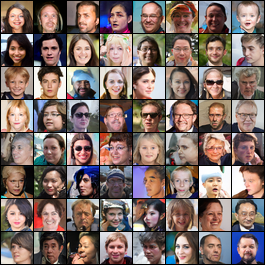

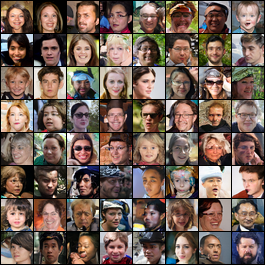

In [95]:
run1_name = expnames_ESM_DSM[4]
run2_name = expnames_ESM_DSM[5]
step = min(get_largest_sample_step(run1_name), get_largest_sample_step(run2_name))
sample_tsr_DSM, imgrid_DSM = load_generated_samples(run1_name, step)
sample_tsr_ESM, imgrid_ESM = load_generated_samples(run2_name, step)
print(run1_name, "step:", step)
print(run2_name, "step:", step)
display(imgrid_DSM)
display(imgrid_ESM)

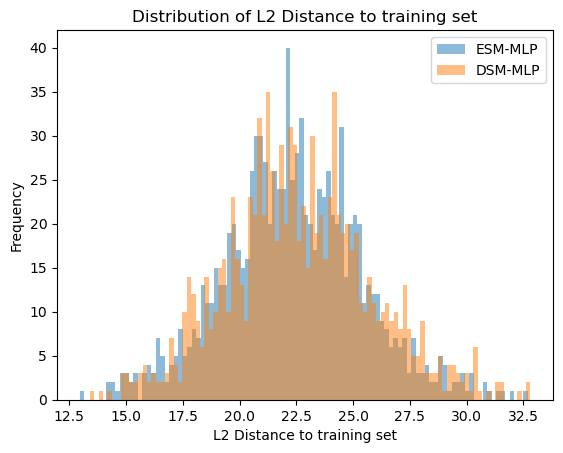

In [100]:
dist2trainset_esm = torch.cdist(sample_tsr_ESM.flatten(1), Xtsr_raw.flatten(1).cuda(), p=2)
min_dists_esm, min_indices_esm = torch.topk(dist2trainset_esm, k=10, dim=1, largest=False)
dist2trainset_dsm = torch.cdist(sample_tsr_DSM.flatten(1), Xtsr_raw.flatten(1).cuda(), p=2)
min_dists_dsm, min_indices_dsm = torch.topk(dist2trainset_dsm, k=10, dim=1, largest=False)
plt.hist(min_dists_esm[:,9].cpu().numpy(), bins=100, alpha=0.5, label="ESM-MLP")
plt.hist(min_dists_dsm[:,9].cpu().numpy(), bins=100, alpha=0.5, label="DSM-MLP")
plt.legend()
plt.xlabel("L2 Distance to training set")
plt.ylabel("Frequency")
plt.title("Distribution of L2 Distance to training set")
plt.show()

FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM step: 100000
FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_ESM step: 100000


/tmp/ipykernel_617954/2378753679.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample_tsr = th.load(join(samples_dir, f"samples_epoch_{epoch_num:06d}.pt"))


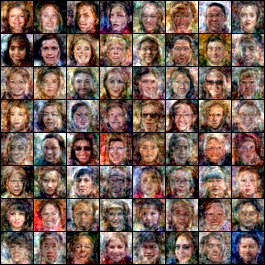

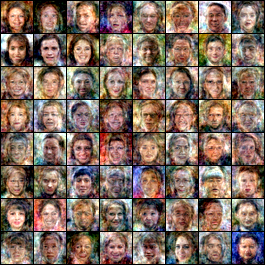

In [83]:
run1_name = expnames_ESM_DSM[6]
run2_name = expnames_ESM_DSM[7]
sample_tsr_DSM, imgrid_DSM = load_generated_samples(run1_name, get_largest_sample_step(run1_name))
sample_tsr_ESM, imgrid_ESM = load_generated_samples(run2_name, get_largest_sample_step(run2_name))
print(run1_name, "step:", get_largest_sample_step(run1_name))
print(run2_name, "step:", get_largest_sample_step(run2_name))
display(imgrid_DSM)
display(imgrid_ESM)

FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_DSM step: 50000
FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_ESM step: 50000


/tmp/ipykernel_617954/2378753679.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample_tsr = th.load(join(samples_dir, f"samples_epoch_{epoch_num:06d}.pt"))


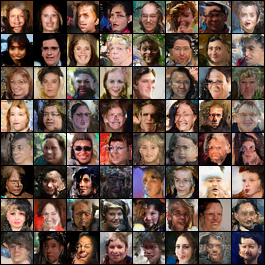

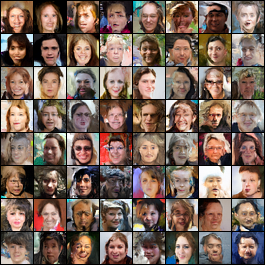

FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_DSM step: 6280
FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_ESM step: 6280


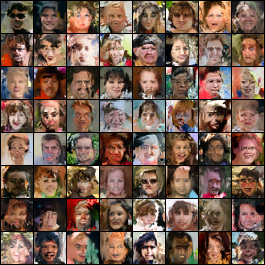

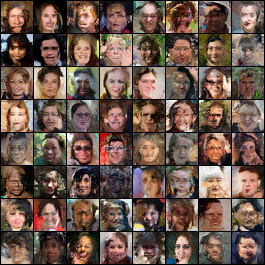

FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_DSM step: 50000
FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_ESM step: 50000


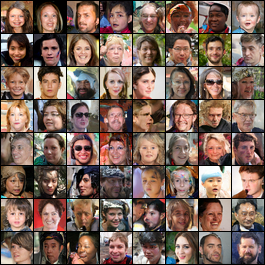

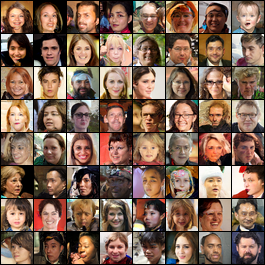

FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM step: 100000
FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_ESM step: 100000


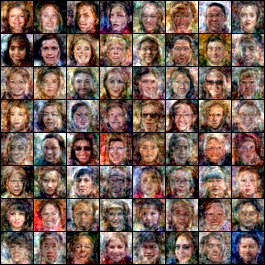

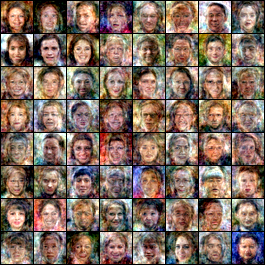

In [156]:
for run_i in [0, 2, 4, 6]:
    run1_name = expnames_ESM_DSM[run_i]
    run2_name = expnames_ESM_DSM[run_i+1]
    step = min(get_largest_sample_step(run1_name), get_largest_sample_step(run2_name))
    sample_tsr_DSM, imgrid_DSM = load_generated_samples(run1_name, step)
    sample_tsr_ESM, imgrid_ESM = load_generated_samples(run2_name, step)
    print(run1_name, "step:", step)
    print(run2_name, "step:", step)
    display(imgrid_DSM)
    display(imgrid_ESM)

### Geometry of generated sample w.r.t. the nearest training samples

In [151]:
from circuit_toolkit.plot_utils import to_imgrid

/tmp/ipykernel_617954/2378753679.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample_tsr = th.load(join(samples_dir, f"samples_epoch_{epoch_num:06d}.pt"))


FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_DSM step: 50000
FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_ESM step: 50000


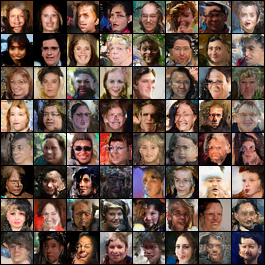

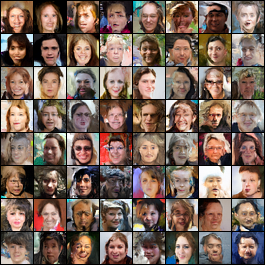

In [147]:
run1_name = expnames_ESM_DSM[0]
run2_name = expnames_ESM_DSM[1]
step = min(get_largest_sample_step(run1_name), get_largest_sample_step(run2_name))
sample_tsr_DSM, imgrid_DSM = load_generated_samples(run1_name, step)
sample_tsr_ESM, imgrid_ESM = load_generated_samples(run2_name, step)
print(run1_name, "step:", step)
print(run2_name, "step:", step)
display(imgrid_DSM)
display(imgrid_ESM)

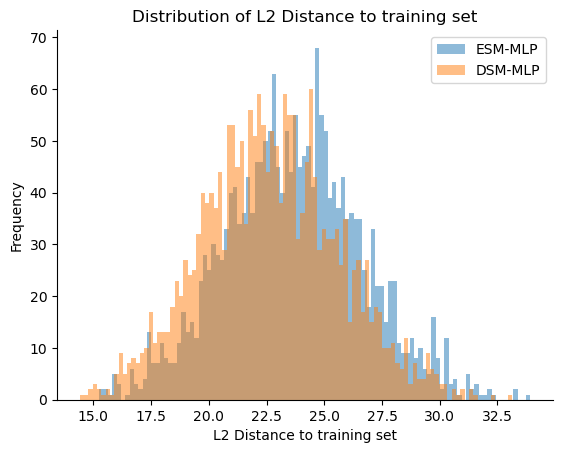

In [148]:
dist2trainset_esm = torch.cdist(sample_tsr_ESM.flatten(1), Xtsr_raw.flatten(1).cuda(), p=2)
min_dists_esm, min_indices_esm = torch.topk(dist2trainset_esm, k=200, dim=1, largest=False)
dist2trainset_dsm = torch.cdist(sample_tsr_DSM.flatten(1), Xtsr_raw.flatten(1).cuda(), p=2)
min_dists_dsm, min_indices_dsm = torch.topk(dist2trainset_dsm, k=200, dim=1, largest=False)
plt.hist(min_dists_esm[:,80].cpu().numpy(), bins=100, alpha=0.5, label="ESM-MLP")
plt.hist(min_dists_dsm[:,80].cpu().numpy(), bins=100, alpha=0.5, label="DSM-MLP")
plt.legend()
plt.xlabel("L2 Distance to training set")
plt.ylabel("Frequency")
plt.title("Distribution of L2 Distance to training set")
plt.show()

In [163]:
saveroot

'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/'

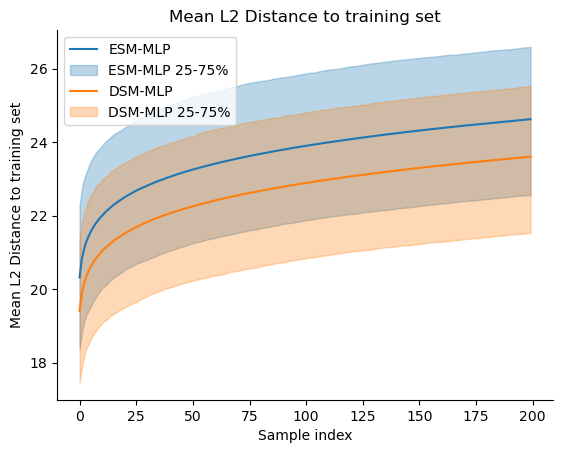

In [ ]:
plt.plot(min_dists_esm.mean(dim=0).cpu().numpy(), label="ESM-MLP")
plt.fill_between(range(len(min_dists_esm.mean(dim=0))), 
                 torch.quantile(min_dists_esm, 0.25, dim=0).cpu().numpy(),
                 torch.quantile(min_dists_esm, 0.75, dim=0).cpu().numpy(),
                 alpha=0.3, label="ESM-MLP 25-75%", color="C0")

plt.plot(min_dists_dsm.mean(dim=0).cpu().numpy(), label="DSM-MLP")
plt.fill_between(range(len(min_dists_dsm.mean(dim=0))), 
                 torch.quantile(min_dists_dsm, 0.25, dim=0).cpu().numpy(),
                 torch.quantile(min_dists_dsm, 0.75, dim=0).cpu().numpy(),
                 alpha=0.3, label="DSM-MLP 25-75%", color="C1")

plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Mean L2 Distance to training set")
plt.title("Mean L2 Distance to training set")
plt.show()

In [140]:
from scipy.stats import ttest_ind, ttest_rel

# Perform t-test on the 80th smallest distances (as shown in the histogram)
esm_dists = min_dists_esm[:,100].cpu().numpy()
dsm_dists = min_dists_dsm[:,100].cpu().numpy()
t_stat, p_value = ttest_rel(esm_dists, dsm_dists)
print(f"T-test results:")
print(f"ESM mean distance: {esm_dists.mean():.4f}")
print(f"DSM mean distance: {dsm_dists.mean():.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")


T-test results:
ESM mean distance: 24.2970
DSM mean distance: 23.9586
T-statistic: 10.4708
P-value: 2.0465e-24


In [103]:
min_indices_dsm[0]

tensor([51646,  6788, 11833, 10444, 62582, 57355, 46766,  4132, 64166, 67100],
       device='cuda:0')

In [109]:
Xtsr = Xtsr_raw.cpu() * 0.5 + 0.5
gen_sample_tsr_ESM = (sample_tsr_ESM.cpu() * 0.5 + 0.5).clamp(0, 1).reshape(-1, 3, 32, 32)
gen_sample_tsr_DSM = (sample_tsr_DSM.cpu() * 0.5 + 0.5).clamp(0, 1).reshape(-1, 3, 32, 32)

ESM-UNet - gen_id: 800


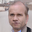

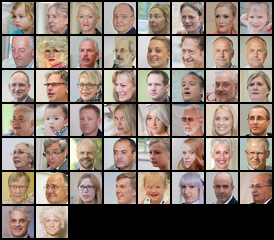

DSM-UNet - gen_id: 800


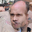

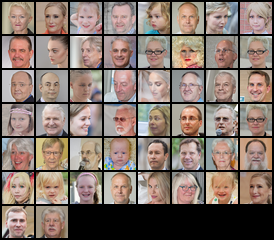

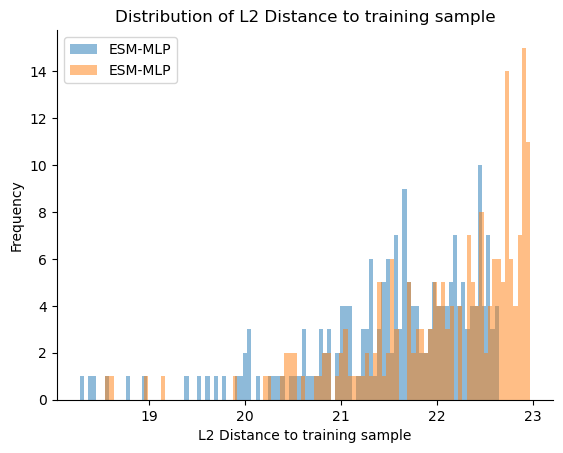

In [142]:
gen_id = 800
print("ESM-UNet - gen_id:", gen_id)
display(to_imgrid(gen_sample_tsr_ESM[gen_id].cpu()))
display(to_imgrid(Xtsr[min_indices_esm[gen_id,:50].cpu()]))
print("DSM-UNet - gen_id:", gen_id)
display(to_imgrid(gen_sample_tsr_DSM[gen_id].cpu()))
display(to_imgrid(Xtsr[min_indices_dsm[gen_id,:50].cpu()]))
plt.hist(min_dists_esm[gen_id,:].cpu().numpy(), bins=100, alpha=0.5, label="ESM-MLP");
plt.hist(min_dists_dsm[gen_id,:].cpu().numpy(), bins=100, alpha=0.5, label="ESM-MLP");
plt.xlabel("L2 Distance to training sample")
plt.ylabel("Frequency")
plt.title("Distribution of L2 Distance to training sample")
plt.legend()
plt.show()

## Geometry of GMM denoiser vs X0

In [41]:
def predict_sigma_transition(Npnts, mindist, EPS=0.001):
    sigma_transition = mindist / np.sqrt(2 * np.log(Npnts / EPS))
    return sigma_transition

In [ ]:
pnts = Xtsr_raw.flatten(1)
# shortest distance between each other 
pnts_distmat = torch.cdist(pnts.cuda(), pnts.cuda()).cpu()
print(pnts.std())
print(torch.nanmean(pnts_distmat))
pnts_distmat.fill_diagonal_(float('inf'))
# find the shortest distance between each other
shortest_dist = torch.min(pnts_distmat, dim=1)[0]
print(torch.nanmean(shortest_dist))

tensor(0.5275)
tensor(38.0111)
tensor(19.9065)


In [ ]:
# mean_mindist = 19.9065
mean_mindist = torch.mean(shortest_dist)
transition_sigma = predict_sigma_transition(len(pnts), mean_mindist, EPS=0.001)
transition_sigma

tensor(3.3119)

In [ ]:
torch.cuda.empty_cache()

In [15]:
import torch
from core.diffusion_esm_edm_lib import delta_GMM_denoiser
# device = get_device()
device = "cuda"
pnts = Xtsr_raw.to(device).flatten(1)
sigma = 1.0
# model_precd_esm = torch.load(join(savedir, f"model_precd_esm.pth"))
# model_precd_dsm  = torch.load(join(savedir, f"model_precd_dsm.pth"))
for sigma in [0.002, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 3.0, 3.5, 4.0, 5.0, 10.0, 20.0, 50.0, 100.0]:
    # Create multiple noised versions for better evaluation
    num_reps = 1
    # Create all noised points and sigma vectors at once
    pnts_rep = pnts[::10] #pnts.repeat(num_reps, 1)
    noised_pnts = pnts_rep + sigma * torch.randn(pnts_rep.shape[0], pnts.shape[1], device=device)
    sigma_vec = torch.full((pnts_rep.shape[0],), sigma, device=device)
    noised_pnts = noised_pnts.to(device)
    sigma_vec = sigma_vec.to(device)
    # denoised_esm = model_precd_esm(noised_pnts, sigma_vec)
    # denoised_dsm = model_precd_dsm(noised_pnts, sigma_vec)
    denoised_gmm = delta_GMM_denoiser(noised_pnts, pnts.to(device), sigma_vec[:, None])
    # mmse_esm = torch.mean((denoised_esm - denoised_gmm) ** 2)
    # mmse_dsm = torch.mean((denoised_dsm - denoised_gmm) ** 2)
    mmse_gmm = torch.mean((denoised_gmm - pnts_rep) ** 2)
    print(f"sigma: {sigma}\tMMSE of GMM - X0: {mmse_gmm.item():.5f}")
    # print(f"MMSE of DSM: {mmse_dsm.item()}")

sigma: 0.002	MMSE of GMM - X0: 0.00000
sigma: 0.005	MMSE of GMM - X0: 0.00000
sigma: 0.01	MMSE of GMM - X0: 0.00000
sigma: 0.05	MMSE of GMM - X0: 0.00000
sigma: 0.1	MMSE of GMM - X0: 0.00000
sigma: 0.5	MMSE of GMM - X0: 0.00000
sigma: 1.0	MMSE of GMM - X0: 0.00000
sigma: 2.0	MMSE of GMM - X0: 0.00001
sigma: 3.0	MMSE of GMM - X0: 0.00284
sigma: 3.5	MMSE of GMM - X0: 0.01127
sigma: 4.0	MMSE of GMM - X0: 0.02689
sigma: 5.0	MMSE of GMM - X0: 0.06984
sigma: 10.0	MMSE of GMM - X0: 0.17528
sigma: 20.0	MMSE of GMM - X0: 0.21670
sigma: 50.0	MMSE of GMM - X0: 0.23776
sigma: 100.0	MMSE of GMM - X0: 0.24193


In [17]:
torch.cuda.empty_cache()

## Load and Compare model prediction

In [56]:
def Gaussian_denoiser(Xt, Xmean, Xcov, sigma):
    """
    Gaussian denoiser
    """
    return Xt + sigma**2 * (Xmean.unsqueeze(0) - Xt) @ \
        (Xcov + sigma**2 * torch.eye(Xmean.shape[0])).inverse()
        
def Gaussian_denoiser_eigen(Xt, Xmean, Xcov_eigval, Xcov_eigvec, sigma):
    """
    Gaussian denoiser
    """
    residual = Xmean.unsqueeze(0) - Xt  # (B, D)
    residual_proj = (residual @ Xcov_eigvec) # (B, D)
    if isinstance(sigma, float):
        sigma = sigma * torch.ones(Xt.shape[0], 1, device=Xt.device)
    elif isinstance(sigma, torch.Tensor):
        if sigma.ndim == 1:
            sigma = sigma.unsqueeze(1)
        elif sigma.ndim == 2:
            pass
        elif sigma.ndim > 2:
            sigma = sigma.squeeze().unsqueeze(1)
        else:
            raise ValueError(f"sigma must be a float or a 1D or 2D tensor, but got {sigma.ndim}D tensor")
    scaling = sigma ** 2 / (sigma**2 + Xcov_eigval[None, :])
    rescaled_residual_proj = residual_proj * scaling # (B, D)
    return Xt + (rescaled_residual_proj @ Xcov_eigvec.T)#.view(Xt.shape)

In [ ]:
from core.diffusion_esm_edm_lib import delta_GMM_denoiser
import pandas as pd
from tqdm import tqdm
@torch.no_grad()
def compute_model_mmse_comparison(models_dict, pnts, device, 
                                  num_reps: int | float = 20, num_noise_levels: int = 50, 
                                  batch_size: int | None = 1024,
                                  eigval: torch.Tensor | None = None,
                                  eigvec: torch.Tensor | None = None):
    """
    Compute MMSE comparison between different models and GMM denoiser across noise levels.
    
    Args:
        models_dict: Dictionary with model names as keys and model objects as values
        pnts: Training data points
        device: Device to run computation on
        
    Returns:
        DataFrame with MMSE statistics across noise levels
    """
    # pnts = pnts.to(device)
    trainX_mean = pnts.mean(0)
    if eigval is None or eigvec is None:
        eigval, eigvec = torch.linalg.eigh(torch.cov(pnts.T))
    # Create multiple noised versions for better evaluation
    if num_reps >= 1 and isinstance(num_reps, int):
        pnts_rep = pnts.repeat(num_reps, 1)
    elif num_reps < 1 and num_reps > 0 and isinstance(num_reps, float):
        # random select num_reps * pnts.shape[0] points
        # Randomly select a subset of points when num_reps is a fraction
        num_samples = int(num_reps * pnts.shape[0])
        random_indices = torch.randperm(pnts.shape[0])[:num_samples]
        pnts_rep = pnts[random_indices]
    else:
        raise ValueError(f"Invalid num_reps: {num_reps}")

    stats_col = []
    mmse_all_col = []
    for sigma in tqdm(np.logspace(np.log10(0.002), np.log10(100.0), num_noise_levels)):
        # Create all noised points and sigma vectors at once
        noised_pnts = pnts_rep + sigma * torch.randn(pnts_rep.shape[0], pnts.shape[1], device=pnts_rep.device)
        sigma_vec = torch.full((pnts_rep.shape[0],), sigma, )
        # Compute GMM denoiser reference
        # Batch evaluation for GMM denoiser
        if batch_size is not None:
            denoised_gmm = torch.zeros_like(noised_pnts)
            for i in range(0, noised_pnts.shape[0], batch_size):
                batch_noised = noised_pnts[i:i+batch_size]
                batch_sigma = sigma_vec[i:i+batch_size, None]
                denoised_batch = delta_GMM_denoiser(batch_noised.to(device), pnts.to(device), batch_sigma.to(device))
                denoised_gmm[i:i+batch_size] = denoised_batch.cpu()
            # denoised_gmm = torch.cat(denoised_gmm_list, dim=0)
        else:
            denoised_gmm = delta_GMM_denoiser(noised_pnts.to(device), pnts.to(device), sigma_vec[:, None].to(device)).cpu()
        # Compute Gaussian denoiser reference
        denoised_Gaussian = Gaussian_denoiser_eigen(noised_pnts.to(device), 
                                                    trainX_mean.to(device), 
                                                    eigval.to(device), eigvec.to(device), 
                                                    sigma_vec.to(device)).cpu()
        # Initialize stats dictionary for this sigma
        stats_row = {"sigma": sigma}
        mmse_all = {"sigma": sigma}
        # Compute denoised results and MMSE for each model
        for model_name, model in models_dict.items():
            if batch_size is not None:
                # denoised_list = []
                denoised = torch.zeros_like(noised_pnts)
                for i in range(0, noised_pnts.shape[0], batch_size):
                    batch_noised = noised_pnts[i:i+batch_size]
                    batch_sigma = sigma_vec[i:i+batch_size]
                    denoised_batch = model(batch_noised.to(device), batch_sigma.to(device))
                    denoised[i:i+batch_size] = denoised_batch.cpu()
                # denoised = torch.cat(denoised_list, dim=0)
            else:
                denoised = model(noised_pnts.to(device), sigma_vec.to(device)).cpu()
            mmse_to_gmm = torch.mean((denoised - denoised_gmm) ** 2, dim=-1)
            mmse_to_x0 = torch.mean((denoised - pnts_rep) ** 2, dim=-1)
            mmse_to_Gaussian = torch.mean((denoised - denoised_Gaussian) ** 2, dim=-1)
            stats_row[f"mmse_{model_name}_to_gmm"] = mmse_to_gmm.mean().item()
            stats_row[f"mmse_{model_name}_to_x0"] = mmse_to_x0.mean().item()
            stats_row[f"mmse_{model_name}_to_Gaussian"] = mmse_to_Gaussian.mean().item()
            mmse_all[f"mmse_{model_name}_to_gmm"] = mmse_to_gmm
            mmse_all[f"mmse_{model_name}_to_x0"] = mmse_to_x0
            mmse_all[f"mmse_{model_name}_to_Gaussian"] = mmse_to_Gaussian
        
        # Add GMM to X0 MMSE as reference
        mmse_gmm_x0 = torch.mean((denoised_gmm - pnts_rep) ** 2, dim=-1)
        mmse_Gaussian_to_x0 = torch.mean((denoised_Gaussian - pnts_rep) ** 2, dim=-1)
        mmse_Gaussian_to_gmm = torch.mean((denoised_Gaussian - denoised_gmm) ** 2, dim=-1)
        stats_row["mmse_gmm_to_x0"] = mmse_gmm_x0.mean().item()
        stats_row["mmse_Gaussian_to_x0"] = mmse_Gaussian_to_x0.mean().item()
        stats_row["mmse_Gaussian_to_gmm"] = mmse_Gaussian_to_gmm.mean().item()
        mmse_all["mmse_gmm_to_x0"] = mmse_gmm_x0
        mmse_all["mmse_Gaussian_to_x0"] = mmse_Gaussian_to_x0
        mmse_all["mmse_Gaussian_to_gmm"] = mmse_Gaussian_to_gmm
        
        stats_col.append(stats_row)
        mmse_all_col.append(mmse_all)
    stats_df = pd.DataFrame(stats_col)
    # mmse_all_df = pd.DataFrame(mm÷se_all_col)
    return stats_df, mmse_all_col

In [7]:
!ls -l /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM/

total 576424
-rw-rw-r--+ 1 binxuwang kempner_fellow_binxuwang       426 Jul 27 22:05 args.json
drwxrwsr-x+ 2 binxuwang kempner_fellow_binxuwang      4096 Jul 27 22:05 ckpts
-rw-rw-r--+ 1 binxuwang kempner_fellow_binxuwang        68 Jul 27 22:05 config.json
-rw-rw-r--+ 1 binxuwang kempner_fellow_binxuwang    259828 Jul 27 22:38 learned_samples_final.png
-rw-rw-r--+ 1 binxuwang kempner_fellow_binxuwang      7194 Jul 27 22:38 loss_store.pkl
-rw-rw-r--+ 1 binxuwang kempner_fellow_binxuwang    900331 Jul 27 22:38 loss_traj.pkl
-rw-rw-r--+ 1 binxuwang kempner_fellow_binxuwang 588976047 Jul 27 22:38 model_final.pth
drwxrwsr-x+ 2 binxuwang kempner_fellow_binxuwang     90112 Jul 27 22:38 samples


In [42]:
!ls -d /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32*DSM

/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32_DiT_P2_192D_3H_6L_EDM_pilot_DSM
/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_DSM
/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_DSM
/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_B1024_fixseed_DSM
/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_B4096_fixseed_DSM
/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_DSM
/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve

### Load MLP, CNN, DiT

In [58]:
from core.diffusion_edm_lib import UNetBlockStyleMLP_backbone, EDMPrecondWrapper
import json
expname = "FFHQ32_UNet_MLP_EDM_8L_3072D_lr1e-4_fixseed_DSM"
expdir = join(saveroot, expname)
model_dict = torch.load(join(expdir, "model_final.pth"))
config = json.load(open(join(expdir, "config.json")))
model = UNetBlockStyleMLP_backbone(**config)
model.load_state_dict(torch.load(join(expdir, "model_final.pth")))
model_precd_MLP = EDMPrecondWrapper(model, sigma_data=0.5, sigma_min=0.002, sigma_max=80, rho=7.0)

/tmp/ipykernel_276239/2057874174.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(join(expdir, "model_final.pth"))
/tmp/ipykernel_276239/205787417

In [ ]:
from core.network_edm_lib import SongUNet, DhariwalUNet, create_unet_model
from core.diffusion_edm_lib import UNetBlockStyleMLP_backbone, EDMPrecondWrapper, EDMCNNPrecondWrapper, EDMDiTPrecondWrapper
import json
from easydict import EasyDict as edict
expname = "FFHQ32_UNet_CNN_EDM_4blocks_wide128_attn_pilot_fixednorm_DSM"
expdir = join(saveroot, expname)
# model_dict = torch.load(join(expdir, "model_final.pth"))
config = json.load(open(join(expdir, "config.json")))
unet = create_unet_model(edict(config))
unet.load_state_dict(torch.load(join(expdir, "model_final.pth")))
model_precd_CNN = EDMCNNPrecondWrapper(unet, sigma_data=0.5, sigma_min=0.002, sigma_max=80, rho=7.0)
model_precd_CNN = model_precd_CNN.to("cuda").eval();

total number of trainable parameters in the Score Model: 28183299
total number of parameters in the Score Model: 28183299


/tmp/ipykernel_276239/3026128272.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet.load_state_dict(torch.load(join(expdir, "model_final.pth")))


In [61]:
from core.diffusion_edm_lib import UNetBlockStyleMLP_backbone, EDMPrecondWrapper, EDMCNNPrecondWrapper, EDMDiTPrecondWrapper
from core.DiT_model_lib import *
expname = "FFHQ32_DiT_P2_384D_6H_6L_EDM_pilot_DSM"
expdir = join(saveroot, expname)
config = json.load(open(join(expdir, "config.json")))
DiT_model = DiT(**config)
DiT_model.load_state_dict(torch.load(join(expdir, "model_final.pth")))
model_precd_DiT = EDMDiTPrecondWrapper(DiT_model, sigma_data=0.5, sigma_min=0.002, sigma_max=80, rho=7.0)
model_precd_DiT = model_precd_DiT.cuda().eval()

/tmp/ipykernel_276239/1789147504.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  DiT_model.load_state_dict(torch.load(join(expdir, "model_final.pth")))


In [70]:
# Load models and compute comparison
device = "cuda"
models_dict = {
    "MLP_DSM": model_precd_MLP.cuda(),
    "CNN_DSM": lambda Xt, sigma: model_precd_CNN(Xt.view(Xt.shape[0], 3, 32, 32), sigma).flatten(1),
    "DiT_DSM": lambda Xt, sigma: model_precd_DiT(Xt.view(Xt.shape[0], 3, 32, 32), sigma).flatten(1),
}

stats_df, mmse_all_col = compute_model_mmse_comparison(models_dict, Xtsr_raw.flatten(1), device, num_reps=0.15, num_noise_levels=30, batch_size=1024, 
                                         eigval=eigval, eigvec=eigvec)
# stats_df.to_csv(join(savedir, "stats_col.csv"), index=False)

100%|██████████| 30/30 [04:42<00:00,  9.40s/it]


In [73]:
figdir = r"/n/home12/binxuwang/Github/DiffusionLearningCurve/figures/DSM_vs_ESM_FFHQ32_MLP_DIT_CNN_cmp"
# stats_df.to_csv(join(figdir, "mmse_gmm_denoiser_cmp.csv"), index=False)
stats_df.to_csv(join(figdir, "mmse_dnn_gmm_Gaussian_denoiser_cmp.csv"), index=False)
pkl.dump(mmse_all_col, open(join(figdir, "mmse_dnn_gmm_Gaussian_denoiser_cmp.pkl"), "wb"))

In [48]:
stats_df

sigma  mmse_MLP_DSM_to_gmm  mmse_MLP_DSM_to_x0  mmse_CNN_DSM_to_gmm  \
0     0.002000             0.000005            0.000005             0.000004   
1     0.002904             0.000009            0.000009             0.000008   
2     0.004218             0.000019            0.000019             0.000015   
3     0.006125             0.000038            0.000038             0.000029   
4     0.008895             0.000075            0.000075             0.000054   
5     0.012918             0.000148            0.000148             0.000100   
6     0.018760             0.000282            0.000282             0.000181   
7     0.027244             0.000524            0.000524             0.000321   
8     0.039564             0.000949            0.000949             0.000561   
9     0.057455             0.001677            0.001677             0.000963   
10    0.083438             0.002888            0.002888             0.001618   
11    0.121171             0.004834            0.004834             0.002662   
12    0.175967             0.007834            0.007834             0.004291   
13    0.255543             0.012241            0.012241             0.006781   
14    0.371106             0.018290            0.018290             0.010507   
15    0.538929             0.026190            0.026190             0.016016   
16    0.782646             0.036745            0.036745             0.024120   
17    1.136576             0.051677            0.051677             0.035626   
18    1.650563             0.071699            0.071700             0.051652   
19    2.396986             0.096546            0.096728             0.072207   
20    3.480959             0.114838            0.125522             0.086718   
21    5.055131             0.083294            0.156417             0.052634   
22    7.341180             0.042522            0.186684             0.011609   
23   10.661034             0.031113            0.212220             0.003013   
24   15.482203             0.025479            0.229214             0.002275   
25   22.483618             0.025899            0.247288             0.002117   
26   32.651238             0.043055            0.274854             0.002383   
27   47.416894             0.131033            0.368609             0.002997   
28   68.859926             0.310696            0.550822             0.003799   
29  100.000000             0.493975            0.735340             0.004446   

    mmse_CNN_DSM_to_x0  mmse_DiT_DSM_to_gmm  mmse_DiT_DSM_to_x0  \
0             0.000004             0.000004            0.000004   
1             0.000008             0.000008            0.000008   
2             0.000015             0.000015            0.000015   
3             0.000029             0.000029            0.000029   
4             0.000054             0.000055            0.000055   
5             0.000100             0.000102            0.000102   
6             0.000181             0.000184            0.000184   
7             0.000321             0.000328            0.000328   
8             0.000561             0.000576            0.000576   
9             0.000963             0.000995            0.000995   
10            0.001618             0.001690            0.001690   
11            0.002662             0.002814            0.002814   
12            0.004291             0.004591            0.004591   
13            0.006781             0.007338            0.007338   
14            0.010507             0.011446            0.011446   
15            0.016016             0.017482            0.017482   
16            0.024120             0.026111            0.026111   
17            0.035626             0.037961            0.037961   
18            0.051653             0.053785            0.053786   
19            0.072396             0.073792            0.073981   
20            0.097423             0.087788            0.098500   
21            0.126000             0.053270           

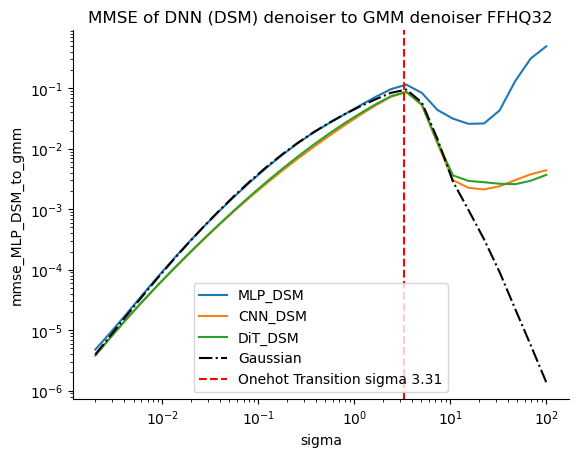

In [74]:
mean_mindist = torch.mean(shortest_dist)
transition_sigma = predict_sigma_transition(len(pnts), mean_mindist, EPS=0.001)
# stats_df = pd.read_csv(join(savedir, "stats_col.csv"))
sns.lineplot(data=stats_df, x="sigma", y="mmse_MLP_DSM_to_gmm", label="MLP_DSM")
sns.lineplot(data=stats_df, x="sigma", y="mmse_CNN_DSM_to_gmm", label="CNN_DSM")
sns.lineplot(data=stats_df, x="sigma", y="mmse_DiT_DSM_to_gmm", label="DiT_DSM")
sns.lineplot(data=stats_df, x="sigma", y="mmse_Gaussian_to_gmm", label="Gaussian", color="black", linestyle="-.")
plt.axvline(x=transition_sigma, color="red", linestyle="--", label=f"Onehot Transition sigma {transition_sigma:.2f}")
plt.xscale("log")
plt.yscale("log")
plt.title(f"MMSE of DNN (DSM) denoiser to GMM denoiser FFHQ32")
plt.legend()
# saveallforms(figdir, "mmse_gmm_denoiser_Gaussian_cmp_lineplot")
plt.show()

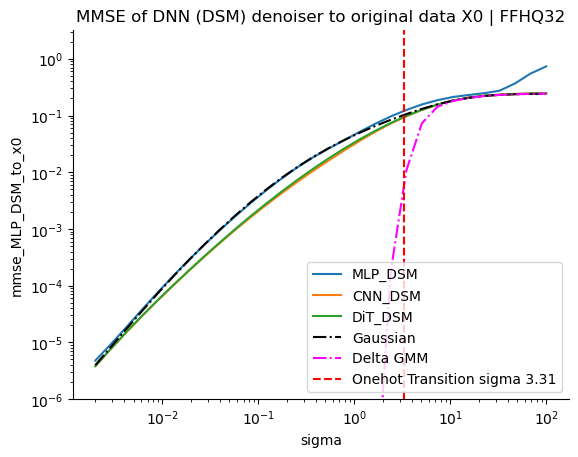

In [79]:
mean_mindist = torch.mean(shortest_dist)
transition_sigma = predict_sigma_transition(len(pnts), mean_mindist, EPS=0.001)
# stats_df = pd.read_csv(join(savedir, "stats_col.csv"))
sns.lineplot(data=stats_df, x="sigma", y="mmse_MLP_DSM_to_x0", label="MLP_DSM")
sns.lineplot(data=stats_df, x="sigma", y="mmse_CNN_DSM_to_x0", label="CNN_DSM")
sns.lineplot(data=stats_df, x="sigma", y="mmse_DiT_DSM_to_x0", label="DiT_DSM")
sns.lineplot(data=stats_df, x="sigma", y="mmse_Gaussian_to_x0", label="Gaussian", color="black", linestyle="-.")
sns.lineplot(data=stats_df, x="sigma", y="mmse_gmm_to_x0", label="Delta GMM", color="magenta", linestyle="-.")
plt.axvline(x=transition_sigma, color="red", linestyle="--", label=f"Onehot Transition sigma {transition_sigma:.2f}")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1E-6, None)
plt.title(f"MMSE of DNN (DSM) denoiser to original data X0 | FFHQ32")
plt.legend()
# saveallforms(figdir, "mmse_gmm_denoiser_Gaussian_cmp_lineplot")
plt.show()

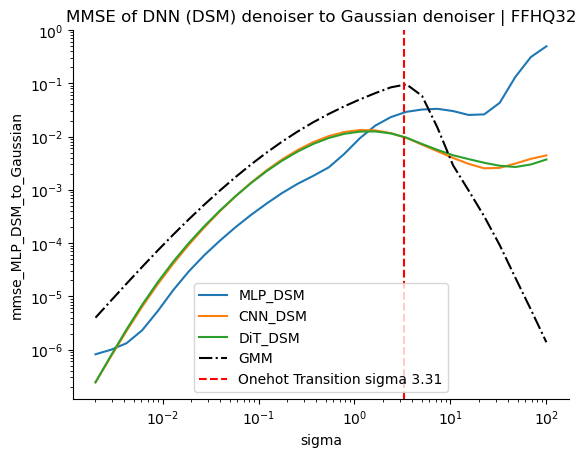

In [76]:
mean_mindist = torch.mean(shortest_dist)
transition_sigma = predict_sigma_transition(len(pnts), mean_mindist, EPS=0.001)
# stats_df = pd.read_csv(join(savedir, "stats_col.csv"))
sns.lineplot(data=stats_df, x="sigma", y="mmse_MLP_DSM_to_Gaussian", label="MLP_DSM")
sns.lineplot(data=stats_df, x="sigma", y="mmse_CNN_DSM_to_Gaussian", label="CNN_DSM")
sns.lineplot(data=stats_df, x="sigma", y="mmse_DiT_DSM_to_Gaussian", label="DiT_DSM")
sns.lineplot(data=stats_df, x="sigma", y="mmse_Gaussian_to_gmm", label="GMM", color="black", linestyle="-.")
plt.axvline(x=transition_sigma, color="red", linestyle="--", label=f"Onehot Transition sigma {transition_sigma:.2f}")
plt.xscale("log")
plt.yscale("log")
plt.title(f"MMSE of DNN (DSM) denoiser to Gaussian denoiser | FFHQ32")
plt.legend()
# saveallforms(figdir, "mmse_gmm_denoiser_Gaussian_cmp_lineplot")
plt.show()

### Gaussian denoiser and comparison

In [13]:
trainX_mean = Xtsr_raw.cuda().flatten(1).mean(dim=0).cpu()
trainX_cov = torch.cov(Xtsr_raw.cuda().flatten(1).T).cpu()
eigval, eigvec = torch.linalg.eigh(trainX_cov.cuda())

In [20]:
trainX_cov.shape

torch.Size([3072, 3072])

In [21]:
torch.cuda.empty_cache()

In [32]:
# Load models and compute comparison
device = "cuda"
models_dict = {
    # "Gaussian": lambda Xt, sigma: Gaussian_denoiser(Xt, trainX_mean.cuda(), trainX_cov.cuda(), sigma),
    "Gaussian": lambda Xt, sigma: Gaussian_denoiser_eigen(Xt, trainX_mean.cuda(), eigval.cuda(), eigvec.cuda(), sigma),
    # "MLP_DSM": model_precd_MLP.cuda(),
    # "CNN_DSM": lambda Xt, sigma: model_precd_CNN(Xt.view(Xt.shape[0], 3, 32, 32), sigma).flatten(1),
    # "DiT_DSM": lambda Xt, sigma: model_precd_DiT(Xt.view(Xt.shape[0], 3, 32, 32), sigma).flatten(1),
}

stats_df = compute_model_mmse_comparison(models_dict, Xtsr_raw.flatten(1), device, num_reps=0.2, num_noise_levels=30, batch_size=2048)

100%|██████████| 30/30 [01:00<00:00,  2.03s/it]


In [33]:
figdir = r"/n/home12/binxuwang/Github/DiffusionLearningCurve/figures/DSM_vs_ESM_FFHQ32_MLP_DIT_CNN_cmp"
stats_df.to_csv(join(figdir, "mmse_Gaussian2gmm_denoiser_cmp.csv"), index=False)

In [34]:
stats_df_dnn = pd.read_csv(join(figdir, "mmse_gmm_denoiser_cmp.csv"))

In [35]:
stats_df_cmb = pd.merge(stats_df_dnn, stats_df, on=["sigma", ], )

In [36]:
stats_df_cmb

sigma  mmse_MLP_DSM_to_gmm  mmse_MLP_DSM_to_x0  mmse_CNN_DSM_to_gmm  \
0     0.255543             0.012241            0.012241             0.006781   
1     0.538929             0.026190            0.026190             0.016016   
2     0.782646             0.036745            0.036745             0.024120   
3     1.136576             0.051677            0.051677             0.035626   
4     1.650563             0.071699            0.071700             0.051652   
5     2.396986             0.096546            0.096728             0.072207   
6     3.480959             0.114838            0.125522             0.086718   
7     5.055131             0.083294            0.156417             0.052634   
8     7.341180             0.042522            0.186684             0.011609   
9    10.661034             0.031113            0.212220             0.003013   
10   15.482203             0.025479            0.229214             0.002275   
11   22.483618             0.025899            0.247288             0.002117   
12   32.651238             0.043055            0.274854             0.002383   
13   47.416894             0.131033            0.368609             0.002997   
14   68.859926             0.310696            0.550822             0.003799   
15  100.000000             0.493975            0.735340             0.004446   

    mmse_CNN_DSM_to_x0  mmse_DiT_DSM_to_gmm  mmse_DiT_DSM_to_x0  \
0             0.006781             0.007338            0.007338   
1             0.016016             0.017482            0.017482   
2             0.024120             0.026111            0.026111   
3             0.035626             0.037961            0.037961   
4             0.051653             0.053785            0.053786   
5             0.072396             0.073792            0.073981   
6             0.097423             0.087788            0.098500   
7             0.126000             0.053270            0.126637   
8             0.155354             0.012306            0.156226   
9             0.183631             0.003618            0.184183   
10            0.206408             0.002962            0.207132   
11            0.223160             0.002817            0.224114   
12            0.234580             0.002632            0.234915   
13            0.240570             0.002598            0.240357   
14            0.244542             0.002972            0.243721   
15            0.245929             0.003712            0.245277   

    mmse_gmm_to_x0_x  mmse_Gaussian_to_gmm  mmse_Gaussian_to_x0  \
0       0.000000e+00              0.012430             0.012430   
1       0.000000e+00              0.026599             0.026599   
2       2.586476e-24              0.037024             0.037024   
3       1.944093e-17              0.049893             0.049893   
4       2.295038e-07              0.065650             0.065650   
5       2.010999e-04              0.084386             0.084630   
6       1.073623e-02              0.095717             0.106622   
7       7.350882e-02              0.058500             0.131298   
8       1.436554e-01              0.014060             0.158142   
9       1.806513e-01              0.002909             0.183680   
10      2.041833e-01              0.000968             0.205438   
11      2.210995e-01              0.000318             0.221719   
12      2.321077e-01              0.000090             0.231516   
13      2.376145e-01              0.000024             0.237336   
14      2.406167e-01              0.000006             0.240583   
15      2.417104e-01              0.000001             0.242233   

    mmse_gmm_to_x0_y  
0       0.000000e+00  
1       0.000000e+00  
2       1.913367e-18  
3       2.332808e-14  
4       9.620550e-11  
5       2.790999e-04  
6       1.077205e-02  
7       7.311393e-02  
8       1.437389e-01  
9       1.807970e-01  
10      2.045498e-01  
11      2.214185e-01  
12      2.314437e-01  
13      2.373112e-01  
14      2.405615e-01  


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from circuit_toolkit.plot_utils import saveallforms

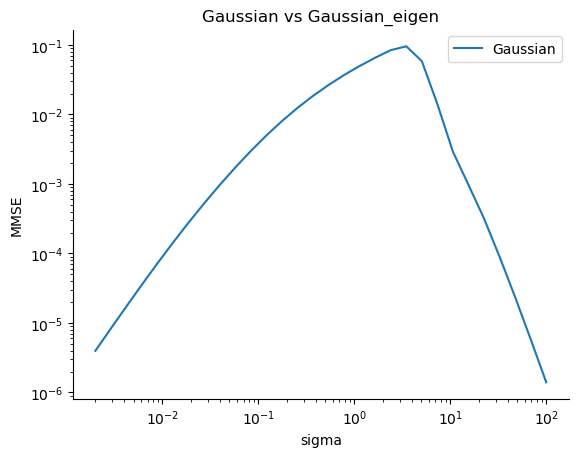

In [51]:
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_Gaussian_to_gmm", label="Gaussian")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("sigma")
plt.ylabel("MMSE")
plt.title("Gaussian vs Gaussian_eigen")
plt.legend()
plt.show()

In [47]:
figdir = r"/n/home12/binxuwang/Github/DiffusionLearningCurve/figures/DSM_vs_ESM_FFHQ32_MLP_DIT_CNN_cmp"
stats_df_gaussian = pd.read_csv(join(figdir, "mmse_Gaussian2gmm_denoiser_cmp.csv"))
stats_df_dnn = pd.read_csv(join(figdir, "mmse_gmm_denoiser_cmp.csv"))
stats_df_cmb = pd.merge(stats_df_dnn, stats_df_gaussian, on=["sigma",], )
stats_df_cmb.to_csv(join(figdir, "mmse_gmm_denoiser_Gaussian_cmp.csv"), index=False)

In [49]:
stats_df_cmb

sigma  mmse_MLP_DSM_to_gmm  mmse_MLP_DSM_to_x0  mmse_CNN_DSM_to_gmm  \
0     0.002000             0.000005            0.000005             0.000004   
1     0.002904             0.000009            0.000009             0.000008   
2     0.004218             0.000019            0.000019             0.000015   
3     0.006125             0.000038            0.000038             0.000029   
4     0.008895             0.000075            0.000075             0.000054   
5     0.012918             0.000148            0.000148             0.000100   
6     0.018760             0.000282            0.000282             0.000181   
7     0.027244             0.000524            0.000524             0.000321   
8     0.039564             0.000949            0.000949             0.000561   
9     0.057455             0.001677            0.001677             0.000963   
10    0.083438             0.002888            0.002888             0.001618   
11    0.121171             0.004834            0.004834             0.002662   
12    0.175967             0.007834            0.007834             0.004291   
13    0.255543             0.012241            0.012241             0.006781   
14    0.371106             0.018290            0.018290             0.010507   
15    0.538929             0.026190            0.026190             0.016016   
16    0.782646             0.036745            0.036745             0.024120   
17    1.136576             0.051677            0.051677             0.035626   
18    1.650563             0.071699            0.071700             0.051652   
19    2.396986             0.096546            0.096728             0.072207   
20    3.480959             0.114838            0.125522             0.086718   
21    5.055131             0.083294            0.156417             0.052634   
22    7.341180             0.042522            0.186684             0.011609   
23   10.661034             0.031113            0.212220             0.003013   
24   15.482203             0.025479            0.229214             0.002275   
25   22.483618             0.025899            0.247288             0.002117   
26   32.651238             0.043055            0.274854             0.002383   
27   47.416894             0.131033            0.368609             0.002997   
28   68.859926             0.310696            0.550822             0.003799   
29  100.000000             0.493975            0.735340             0.004446   

    mmse_CNN_DSM_to_x0  mmse_DiT_DSM_to_gmm  mmse_DiT_DSM_to_x0  \
0             0.000004             0.000004            0.000004   
1             0.000008             0.000008            0.000008   
2             0.000015             0.000015            0.000015   
3             0.000029             0.000029            0.000029   
4             0.000054             0.000055            0.000055   
5             0.000100             0.000102            0.000102   
6             0.000181             0.000184            0.000184   
7             0.000321             0.000328            0.000328   
8             0.000561             0.000576            0.000576   
9             0.000963             0.000995            0.000995   
10            0.001618             0.001690            0.001690   
11            0.002662             0.002814            0.002814   
12            0.004291             0.004591            0.004591   
13            0.006781             0.007338            0.007338   
14            0.010507             0.011446            0.011446   
15            0.016016             0.017482            0.017482   
16            0.024120             0.026111            0.026111   
17            0.035626             0.037961            0.037961   
18            0.051653             0.053785            0.053786   
19            0.072396             0.073792            0.073981   
20            0.097423             0.087788            0.098500   
21            0.126000             0.053270           

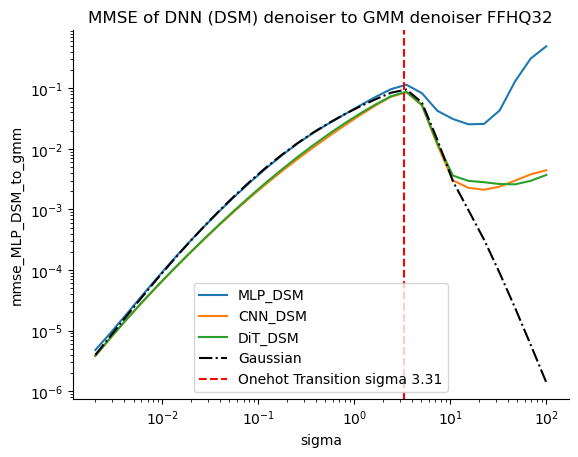

In [48]:
mean_mindist = torch.mean(shortest_dist)
transition_sigma = predict_sigma_transition(len(pnts), mean_mindist, EPS=0.001)
# stats_df = pd.read_csv(join(savedir, "stats_col.csv"))
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_MLP_DSM_to_gmm", label="MLP_DSM")
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_CNN_DSM_to_gmm", label="CNN_DSM")
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_DiT_DSM_to_gmm", label="DiT_DSM")
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_Gaussian_to_gmm", label="Gaussian", color="black", linestyle="-.")
plt.axvline(x=transition_sigma, color="red", linestyle="--", label=f"Onehot Transition sigma {transition_sigma:.2f}")
plt.xscale("log")
plt.yscale("log")
plt.title(f"MMSE of DNN (DSM) denoiser to GMM denoiser FFHQ32")
plt.legend()
saveallforms(figdir, "mmse_gmm_denoiser_Gaussian_cmp_lineplot")
plt.show()

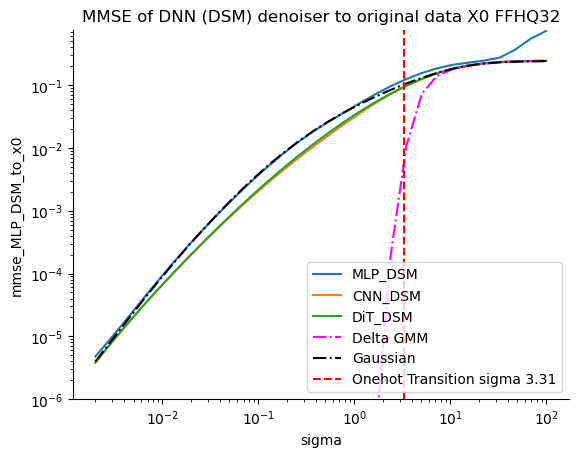

In [55]:
mean_mindist = torch.mean(shortest_dist)
transition_sigma = predict_sigma_transition(len(pnts), mean_mindist, EPS=0.001)
# stats_df = pd.read_csv(join(savedir, "stats_col.csv"))
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_MLP_DSM_to_x0", label="MLP_DSM")
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_CNN_DSM_to_x0", label="CNN_DSM")
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_DiT_DSM_to_x0", label="DiT_DSM")
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_gmm_to_x0_x", label="Delta GMM", color="magenta", linestyle="-.")
sns.lineplot(data=stats_df_cmb, x="sigma", y="mmse_Gaussian_to_x0", label="Gaussian", color="black", linestyle="-.")
plt.axvline(x=transition_sigma, color="red", linestyle="--", label=f"Onehot Transition sigma {transition_sigma:.2f}")
plt.ylim(1E-6, None)
plt.xscale("log")
plt.yscale("log")
plt.title(f"MMSE of DNN (DSM) denoiser to original data X0 FFHQ32")
plt.legend()
# saveallforms(figdir, "mmse_gmm_denoiser_Gaussian_cmp_lineplot")
plt.show()